In [96]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

First Differential Equation:

$$\large\frac{d^2u}{d\lambda^2} - \cos(u)\sin(u)\frac{dv}{d\lambda}\frac{dv}{d\lambda} = 0$$

2nd Differential Equation:

$$\large\frac{d^2v}{d\lambda^2} + 2\cot(u)\frac{du}{d\lambda}\frac{dv}{d\lambda} = 0$$

Define 
* $v_1 = \dot{x_1}$
* $v_2 = \dot{x_2}$


These make up two differential equations. Then noting that $\dot{v_1} = \ddot{x_1}$ and $\dot{v_2} = \ddot{x_2}$ we get

* $\dot{v_1} = \cos(x_1)\sin(x_1)v_2v_2$
* $\dot{v_2} = -2\cot(x_1)v_1v_2$

Then

$$\vec{S} = \begin{bmatrix} x_1\\ v_1 \\  x_2 \\ v_2 \end{bmatrix} \hspace{10mm} \implies \hspace{10mm} \frac{d\vec{S}}{dt} = \begin{bmatrix} \dot{x_1}\\ \dot{v_1} \\ \dot{x_2} \\ \dot{v_2}\end{bmatrix} =  \begin{bmatrix} v_1\\ \cos(x_1)\sin(x_1)v_2v_2\\ v_2 \\ -2\cot(x_1)v_1v_2 \end{bmatrix}$$

In [106]:
def dSdt(t,S):
    x1, v1, x2, v2 = S
    return [v1,
            np.cos(x1)*np.sin(x1)*v2**2,
            v2,
            -2*v1*v2/np.tan(x1)]
x1_0 = np.pi/2
v1_0 = 0.1
x2_0 = np.pi/2
v2_0 = 0.1
S_0 = (x1_0, v1_0, x2_0, v2_0)

In [1]:
t1 = np.linspace(0, 2, 100)
sol = odeint(dSdt, y0=S_0, t=t1, tfirst=True)

NameError: name 'np' is not defined

In [2]:
#sol.T

In [109]:
df = pd.DataFrame({'θ': sol.T[0], 'θ`': sol.T[1], 'φ': sol.T[2], 'φ`': sol.T[3]})
df.iloc[[10]]
df

,θ,θ`,φ,φ`
0,1.570796,0.100000,1.570796,0.100000
1,1.590997,0.099980,1.591001,0.100041
2,1.611189,0.099918,1.611222,0.100163
3,1.631365,0.099816,1.631477,0.100368
4,1.651516,0.099672,1.651781,0.100654
...,...,...,...,...
95,1.868295,-0.095184,4.400773,0.109400
96,1.848999,-0.095835,4.422747,0.108157
97,1.829577,-0.096433,4.444479,0.107007
98,1.810040,-0.096980,4.465988,0.105949


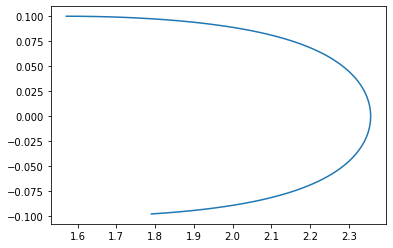

In [110]:
plt.plot(sol.T[0],sol.T[1])

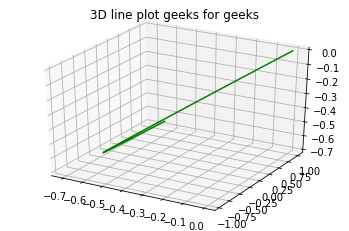

In [115]:
# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

θ=sol.T[0]
φ=sol.T[2]

# defining all 3 axes

z = np.cos(θ)
x = np.cos(φ)*np.sin(θ)
y = np.sin(φ)*np.sin(θ)

# plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('3D line plot geeks for geeks')
plt.show()
